**KHAN MOHD OWAIS RAZA**

**20BCD7138**

*CSE4005 (Data Warehousing and Data Mining) Lab-7*

$Q1$

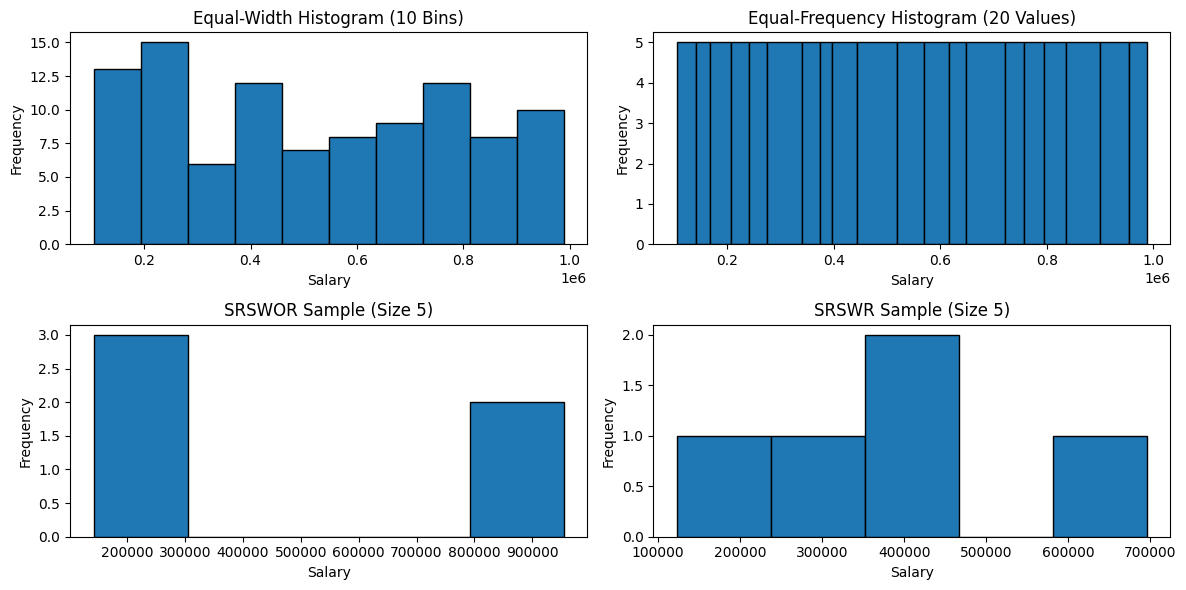

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
salary_data = np.random.uniform(100000, 1000000, 100)
strata = ['low', 'medium', 'high']
salary_strata = np.random.choice(strata, len(salary_data))
data = pd.DataFrame({'Salary': salary_data, 'Stratum': salary_strata})
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(salary_data, bins=10, edgecolor='black')
plt.title('Equal-Width Histogram (10 Bins)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.subplot(2, 2, 2)
plt.hist(salary_data, bins=np.percentile(salary_data, np.linspace(0, 100, 21)), edgecolor='black')
plt.title('Equal-Frequency Histogram (20 Values)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
def srswor(data, sample_size):
    return np.random.choice(data, sample_size, replace=False)
def srswr(data, sample_size):
    return np.random.choice(data, sample_size, replace=True)
def stratified_sampling(data, strata, sample_size):
    stratum_sizes = {stratum: int(sample_size * len(data[data['Stratum'] == stratum]) / len(data)) for stratum in strata}
    samples = []
    for stratum, size in stratum_sizes.items():
        samples.extend(srswr(data[data['Stratum'] == stratum]['Salary'], size))
    return np.array(samples)
srswor_sample = srswor(data['Salary'], 5)
srswr_sample = srswr(data['Salary'], 5)
stratified_sample = stratified_sampling(data, strata, 5)
plt.subplot(2, 2, 3)
plt.hist(srswor_sample, bins=5, edgecolor='black')
plt.title('SRSWOR Sample (Size 5)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.hist(srswr_sample, bins=5, edgecolor='black')
plt.title('SRSWR Sample (Size 5)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

$Q2$

$a)$

In [11]:
import pandas as pd
import numpy as np
column_names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv('/content/crx.data', header=None, names=column_names)
df = df.replace('?', np.nan)
print(df.isnull().sum())
df['A2'] = pd.to_numeric(df['A2'])
df['A14'] = pd.to_numeric(df['A14'])
df = df.replace({'A16': {'+': 1, '-': 0}})

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


$b)$

In [12]:
df.to_csv(' Transformed_crx.csv', index=False)
df1=pd.read_csv('/content/ Transformed_crx.csv')
print(df1.isnull().sum().sort_values(ascending=True))
df2=df1.dropna()

A3      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A15     0
A16     0
A4      6
A5      6
A6      9
A7      9
A1     12
A2     12
A14    13
dtype: int64


$c)$

In [15]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
dfMean = df1.copy()
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
columns_to_impute = ['A2', 'A3', 'A8', 'A11', 'A15']
for column in columns_to_impute:
    imputer_mean.fit(dfMean[[column]])
    dfMean[column] = imputer_mean.transform(dfMean[[column]])
dfMedian = df1.copy()
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
for column in columns_to_impute:
    imputer_median.fit(dfMedian[[column]])
    dfMedian[column] = imputer_median.transform(dfMedian[[column]])
missing_values_median = dfMedian.isnull().sum()
print("DataFrame after mean imputation:")
print(dfMean)
print("\nDataFrame after median imputation:")
print(dfMedian)
print("\nMissing values after median imputation:")
print(missing_values_median)

DataFrame after mean imputation:
    A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14    A15  \
0    b  30.83   0.000  u  g   w   v  1.25  t   t  1.0   f   g  202.0    0.0   
1    a  58.67   4.460  u  g   q   h  3.04  t   t  6.0   f   g   43.0  560.0   
2    a  24.50   0.500  u  g   q   h  1.50  t   f  0.0   f   g  280.0  824.0   
3    b  27.83   1.540  u  g   w   v  3.75  t   t  5.0   t   g  100.0    3.0   
4    b  20.17   5.625  u  g   w   v  1.71  t   f  0.0   f   s  120.0    0.0   
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...    ...   
685  b  21.08  10.085  y  p   e   h  1.25  f   f  0.0   f   g  260.0    0.0   
686  a  22.67   0.750  u  g   c   v  2.00  f   t  2.0   t   g  200.0  394.0   
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t  1.0   t   g  200.0    1.0   
688  b  17.92   0.205  u  g  aa   v  0.04  f   f  0.0   f   g  280.0  750.0   
689  b  35.00   3.375  u  g   c   h  8.29  f   f  0.0   t   g    0.0    0.0   

     A16  
0      

$d)$

In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.read_csv('Transformed_crx.csv')
print("Initial Data:")
print(df.head())
columns_to_fill = ['A4', 'A5', 'A6', 'A7']
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(col.mode()[0]))
print("\nData after filling missing values with mode using pandas:")
print(df.head())
imputer = SimpleImputer(strategy='most_frequent')
df[columns_to_fill] = imputer.fit_transform(df[columns_to_fill])
print("\nData after filling missing values with mode using SimpleImputer:")
print(df.head())

Initial Data:
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15  A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0    1
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560    1
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824    1
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3    1
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0    1

Data after filling missing values with mode using pandas:
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15  A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0    1
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560    1
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824    1
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3    1
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0    1

Data after filling missing values with

$e)$

In [48]:
df1 = pd.read_csv('/content/Transformed_crx.csv')
df1.isnull().sum()
df1 = pd.read_csv('/content/Transformed_crx.csv')
dftestA2 = df1[df1['A2'].isnull()]
dftestA2
df2 = df1.dropna(inplace=False)
xtrain = df2[['A3','A8']]
ytrain = df2[['A2']]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)
LinearRegression()
xtest = dftestA2[['A3','A8']]
ytest = dftestA2[['A2']]
dftestA2.loc[:, 'A2'] = lr.predict(xtest)
print("Attributes 'A3', 'A8', 'A11', 'A15' have no NAN values")
print(df1.isnull().sum())

Attributes 'A3', 'A8', 'A11', 'A15' have no NAN values
A1     12
A2     12
A3     50
A4      6
A5      6
A6      9
A7      9
A8     50
A9     50
A10    50
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


<ipython-input-48-501a4ea40e6a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftestA2.loc[:, 'A2'] = lr.predict(xtest)
